In [ ]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotib.pyplot
!pip install openpyxl
!pip install wordcloud
!pip install imblearn
!pip install scikit-learn
!pip install sklearn

ERROR: Could not find a version that satisfies the requirement matplotib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotib.pyplot


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

Disini saya menggunakan VSCODE

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler

Disini saya melakukan load data untuk mengetahui data facial

1. Agregasi Data

Disini saya akan melakukan agregasi khusus pada data Facial skin temperature.

In [ ]:
facialkosong = pd.read_csv("facial_skin_temperature.csv")
facialkosong.head()

,time,facial_skin_temperature
0,3.0,33.680000
1,4.0,33.675267
2,5.0,33.669857
3,6.0,33.663907
4,7.0,33.657555


In [ ]:
facialsatu = pd.read_csv("facial_skin_temperature (1).csv")
facialsatu.head()

,time,facial_skin_temperature
0,4.0,34.13
1,5.0,34.13
2,6.0,34.13
3,7.0,34.13
4,8.0,34.13


In [ ]:
facialdua = pd.read_csv("facial_skin_temperature (2).csv")
facialdua.head()

,time,facial_skin_temperature
0,1.0,34.104500
1,2.0,34.102889
2,3.0,34.101048
3,4.0,34.099022
4,5.0,34.096860


In [ ]:
# disini saya menggabungkan semua user (facialkososng, facialsatu, facialdua) tentang data facial
facial = pd.concat([facialkosong, facialsatu, facialdua], axis=1)

In [ ]:
# menampilkan semua data yang sudah di satukan
facial.head()

,time,facial_skin_temperature,time,facial_skin_temperature,time,facial_skin_temperature
0,3.0,33.680000,4.0,34.13,1.0,34.104500
1,4.0,33.675267,5.0,34.13,2.0,34.102889
2,5.0,33.669857,6.0,34.13,3.0,34.101048
3,6.0,33.663907,7.0,34.13,4.0,34.099022
4,7.0,33.657555,8.0,34.13,5.0,34.096860


In [ ]:
# untuk mengetahui informasi dari data facial
facial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1529 entries, 0 to 1528
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   time                     1527 non-null   float64
 1   facial_skin_temperature  1527 non-null   float64
 2   time                     1527 non-null   float64
 3   facial_skin_temperature  1527 non-null   float64
 4   time                     1529 non-null   float64
 5   facial_skin_temperature  1529 non-null   float64
dtypes: float64(6)
memory usage: 71.8 KB


In [ ]:
facial.tail()

,time,facial_skin_temperature,time,facial_skin_temperature,time,facial_skin_temperature
1524,1527.0,35.323935,1528.0,34.13,1525.0,34.303326
1525,1528.0,35.360129,1529.0,34.13,1526.0,34.278823
1526,1529.0,35.398129,1530.0,34.13,1527.0,34.255235
1527,NaN,NaN,NaN,NaN,1528.0,34.232106
1528,NaN,NaN,NaN,NaN,1529.0,34.209206


In [ ]:
# untuk mengetahui deskripsi data seperti mean, median, modus
facial.describe().T

,count,mean,std,min,25%,50%,75%,max
time,1527.0,766.000000,4.409512e+02,3.000000,384.500000,766.000000,1147.500000,1529.000000
facial_skin_temperature,1527.0,34.985872,3.607629e-01,33.463419,34.837613,35.040323,35.206032,35.648323
time,1527.0,767.000000,4.409512e+02,4.000000,385.500000,767.000000,1148.500000,1530.000000
facial_skin_temperature,1527.0,34.130000,1.818917e-16,34.130000,34.130000,34.130000,34.130000,34.130000
time,1529.0,765.000000,4.415286e+02,1.000000,383.000000,765.000000,1147.000000,1529.000000
facial_skin_temperature,1529.0,34.106223,2.196416e-01,33.422452,33.960819,34.082016,34.273987,34.682753


Berdasarkan informasi diatas dapat diketahui bahwasannya untuk rata rata dari waktu yang digunakan adalah berkisar 766.000000 dan untuk facial skin temperature	34.130000

analisis missing value dan berikan penjelasan dan solusi yang diperlukan pada data facial

In [ ]:
print("\nMissing values:")
facial.isnull().sum()


Missing values:


time                       2
facial_skin_temperature    2
time                       2
facial_skin_temperature    2
time                       0
facial_skin_temperature    0
dtype: int64

In [ ]:
# Hanya kolom numerik yang akan diimputasi dengan mean, median, modus
numerical_cols = facial.select_dtypes(include=[np.number]).columns

print("\nKolom numerik yang akan diimputasi:", numerical_cols)


Kolom numerik yang akan diimputasi: Index(['time', 'facial_skin_temperature', 'time', 'facial_skin_temperature',
       'time', 'facial_skin_temperature'],
      dtype='object')


In [ ]:
# Membuat copy data untuk masing-masing metode imputasi
facial_mean = facial.copy()
facial_median = facial.copy()
facial_mode = facial.copy()

In [ ]:
imputer_mean = SimpleImputer(strategy="mean")
imputer_median = SimpleImputer(strategy="median")
imputer_mode = SimpleImputer(strategy="most_frequent")

In [ ]:
# Terapkan imputasi pada kolom numerik
facial_mean[numerical_cols] = imputer_mean.fit_transform(facial_mean[numerical_cols])

print("\nData setelah Imputasi Mean:")
facial_mean.head()


Data setelah Imputasi Mean:


,time,facial_skin_temperature,time,facial_skin_temperature,time,facial_skin_temperature
0,3.0,33.680000,4.0,34.13,1.0,34.104500
1,4.0,33.675267,5.0,34.13,2.0,34.102889
2,5.0,33.669857,6.0,34.13,3.0,34.101048
3,6.0,33.663907,7.0,34.13,4.0,34.099022
4,7.0,33.657555,8.0,34.13,5.0,34.096860


In [ ]:
facial_median[numerical_cols] = imputer_median.fit_transform(facial_median[numerical_cols])

print("\nData setelah Imputasi Median:")
facial_median.head()


Data setelah Imputasi Median:


,time,facial_skin_temperature,time,facial_skin_temperature,time,facial_skin_temperature
0,3.0,33.680000,4.0,34.13,1.0,34.104500
1,4.0,33.675267,5.0,34.13,2.0,34.102889
2,5.0,33.669857,6.0,34.13,3.0,34.101048
3,6.0,33.663907,7.0,34.13,4.0,34.099022
4,7.0,33.657555,8.0,34.13,5.0,34.096860


In [ ]:
facial_mode[numerical_cols] = imputer_mode.fit_transform(facial_mode[numerical_cols])

print("\nData setelah Imputasi Modus:")
facial_mode.head()


Data setelah Imputasi Modus:


,time,facial_skin_temperature,time,facial_skin_temperature,time,facial_skin_temperature
0,3.0,33.680000,4.0,34.13,1.0,34.104500
1,4.0,33.675267,5.0,34.13,2.0,34.102889
2,5.0,33.669857,6.0,34.13,3.0,34.101048
3,6.0,33.663907,7.0,34.13,4.0,34.099022
4,7.0,33.657555,8.0,34.13,5.0,34.096860


In [ ]:
facial.corr

<bound method DataFrame.corr of         time  facial_skin_temperature    time  facial_skin_temperature  \
0        3.0                33.680000     4.0                    34.13   
1        4.0                33.675267     5.0                    34.13   
2        5.0                33.669857     6.0                    34.13   
3        6.0                33.663907     7.0                    34.13   
4        7.0                33.657555     8.0                    34.13   
...      ...                      ...     ...                      ...   
1524  1527.0                35.323935  1528.0                    34.13   
1525  1528.0                35.360129  1529.0                    34.13   
1526  1529.0                35.398129  1530.0                    34.13   
1527     NaN                      NaN     NaN                      NaN   
1528     NaN                      NaN     NaN                      NaN   

        time  facial_skin_temperature  
0        1.0                34.104500  

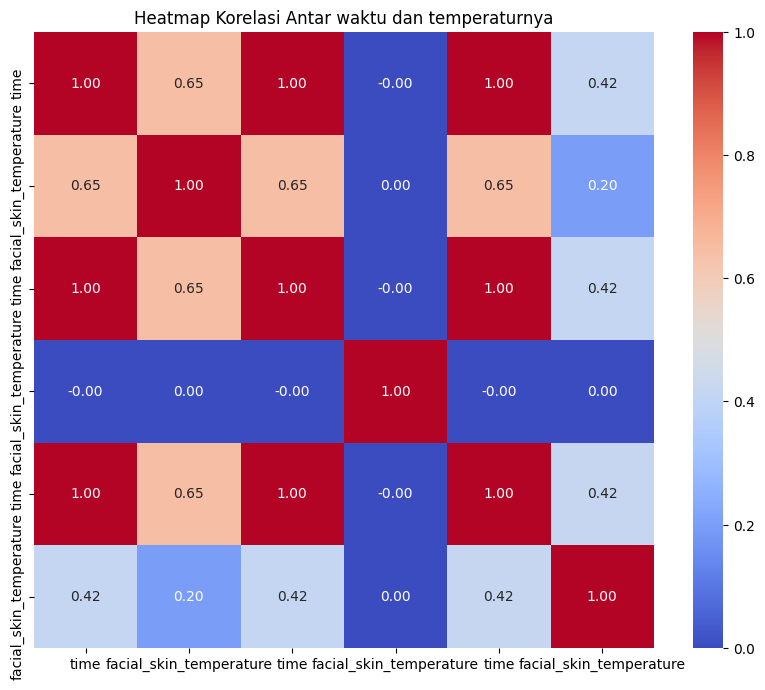

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(facial_mean.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi Antar waktu dan temperaturnya")
plt.show()

Imbalance Handling data dengan undersampling

In [ ]:
# Misalnya kolom target bernama 'Outcome', sesuaikan dengan kolom target di data diabetes
target_column = "time"  # nama kolom
if target_column in facial_mean.columns:
    X = facial_mean.drop(target_column, axis=1)  # Memisahkan fitur
    y = facial_mean[target_column]  # Target
else:
    raise ValueError(f"Kolom '{target_column}' tidak ditemukan dalam data.")

In [ ]:
# melihat outlier
def count_outliers_iqr(facial):
    Q1 = db.quantile(0.25)
    Q3 = db.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((facial < lower_bound) | (facial > upper_bound)).sum()

KORELASI

In [ ]:
heartkosong = pd.read_csv("heart_rate.csv")
heartkosong.head()

,time,heart_rate
0,0.0,73.000000
1,1.0,73.000000
2,2.0,73.000000
3,3.0,73.000000
4,4.0,73.516129


In [ ]:
heartsatu = pd.read_csv("heart_rate (1).csv")
heartsatu.head()

,time,heart_rate
0,0.0,80.0
1,1.0,80.0
2,2.0,80.0
3,3.0,80.0
4,4.0,80.0


In [ ]:
heartdua = pd.read_csv("heart_rate (2).csv")
heartdua.head()

,time,heart_rate
0,0.0,66.000000
1,1.0,65.333333
2,2.0,65.142857
3,3.0,65.066667
4,4.0,65.032258


In [ ]:
# disini saya menggabungkan semua user tentang data hearth
hearth = pd.concat([heartkosong, heartsatu, heartdua], axis=1)

In [ ]:
hearth.head()

,time,heart_rate,time,heart_rate,time,heart_rate
0,0.0,73.000000,0.0,80.0,0.0,66.000000
1,1.0,73.000000,1.0,80.0,1.0,65.333333
2,2.0,73.000000,2.0,80.0,2.0,65.142857
3,3.0,73.000000,3.0,80.0,3.0,65.066667
4,4.0,73.516129,4.0,80.0,4.0,65.032258


In [ ]:
# disini saya menggabungkan semua user tentang data facial dan hearth menjadi mn
mn = pd.concat([facial, hearth], axis=1)

In [ ]:
mn

,time,facial_skin_temperature,time,facial_skin_temperature,time,facial_skin_temperature,time,heart_rate,time,heart_rate,time,heart_rate
0,3.0,33.680000,4.0,34.13,1.0,34.104500,0.0,73.000000,0.0,80.000000,0.0,66.000000
1,4.0,33.675267,5.0,34.13,2.0,34.102889,1.0,73.000000,1.0,80.000000,1.0,65.333333
2,5.0,33.669857,6.0,34.13,3.0,34.101048,2.0,73.000000,2.0,80.000000,2.0,65.142857
3,6.0,33.663907,7.0,34.13,4.0,34.099022,3.0,73.000000,3.0,80.000000,3.0,65.066667
4,7.0,33.657555,8.0,34.13,5.0,34.096860,4.0,73.516129,4.0,80.000000,4.0,65.032258
...,...,...,...,...,...,...,...,...,...,...,...,...
1588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1588.0,85.677419,NaN,NaN
1589,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1589.0,84.806452,NaN,NaN
1590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1590.0,84.870968,NaN,NaN
1591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1591.0,85.419355,NaN,NaN


In [ ]:
mn.describe().T

,count,mean,std,min,25%,50%,75%,max
time,1527.0,766.000000,4.409512e+02,3.000000,384.500000,766.000000,1147.500000,1529.000000
facial_skin_temperature,1527.0,34.985872,3.607629e-01,33.463419,34.837613,35.040323,35.206032,35.648323
time,1527.0,767.000000,4.409512e+02,4.000000,385.500000,767.000000,1148.500000,1530.000000
facial_skin_temperature,1527.0,34.130000,7.105427e-15,34.130000,34.130000,34.130000,34.130000,34.130000
time,1529.0,765.000000,4.415286e+02,1.000000,383.000000,765.000000,1147.000000,1529.000000
facial_skin_temperature,1529.0,34.106223,2.196416e-01,33.422452,33.960819,34.082016,34.273987,34.682753
time,1533.0,766.000000,4.426833e+02,0.000000,383.000000,766.000000,1149.000000,1532.000000
heart_rate,1533.0,76.174042,4.475621e+00,66.129032,73.000000,76.193548,79.193548,88.903226
time,1593.0,796.000000,4.600038e+02,0.000000,398.000000,796.000000,1194.000000,1592.000000
heart_rate,1593.0,84.526760,6.820382e+00,71.096774,79.225806,84.322581,89.096774,106.129032


In [ ]:
# Hanya kolom numerik yang akan diimputasi dengan mean, median, modus
numerical_cols = mn.select_dtypes(include=[np.number]).columns

print("\nKolom numerik yang akan diimputasi:", numerical_cols)


Kolom numerik yang akan diimputasi: Index(['time', 'facial_skin_temperature', 'time', 'facial_skin_temperature',
       'time', 'facial_skin_temperature', 'time', 'heart_rate', 'time',
       'heart_rate', 'time', 'heart_rate'],
      dtype='object')


In [ ]:
# Membuat copy data untuk masing-masing metode imputasi
mn_mean = mn.copy()
mn_median = mn.copy()
mn_mode = mn.copy()

In [ ]:
imputer_mean = SimpleImputer(strategy="mean")
imputer_median = SimpleImputer(strategy="median")
imputer_mode = SimpleImputer(strategy="most_frequent")

In [ ]:
# Terapkan imputasi pada kolom numerik
mn_mean[numerical_cols] = imputer_mean.fit_transform(mn_mean[numerical_cols])

print("\nData setelah Imputasi Mean:")
mn_mean.head()


Data setelah Imputasi Mean:


,time,facial_skin_temperature,time,facial_skin_temperature,time,facial_skin_temperature,time,heart_rate,time,heart_rate,time,heart_rate
0,3.0,33.680000,4.0,34.13,1.0,34.104500,0.0,73.000000,0.0,80.0,0.0,66.000000
1,4.0,33.675267,5.0,34.13,2.0,34.102889,1.0,73.000000,1.0,80.0,1.0,65.333333
2,5.0,33.669857,6.0,34.13,3.0,34.101048,2.0,73.000000,2.0,80.0,2.0,65.142857
3,6.0,33.663907,7.0,34.13,4.0,34.099022,3.0,73.000000,3.0,80.0,3.0,65.066667
4,7.0,33.657555,8.0,34.13,5.0,34.096860,4.0,73.516129,4.0,80.0,4.0,65.032258


In [ ]:
mn_median[numerical_cols] = imputer_median.fit_transform(mn_median[numerical_cols])

print("\nData setelah Imputasi Median:")
mn_median.head()


Data setelah Imputasi Median:


,time,facial_skin_temperature,time,facial_skin_temperature,time,facial_skin_temperature,time,heart_rate,time,heart_rate,time,heart_rate
0,3.0,33.680000,4.0,34.13,1.0,34.104500,0.0,73.000000,0.0,80.0,0.0,66.000000
1,4.0,33.675267,5.0,34.13,2.0,34.102889,1.0,73.000000,1.0,80.0,1.0,65.333333
2,5.0,33.669857,6.0,34.13,3.0,34.101048,2.0,73.000000,2.0,80.0,2.0,65.142857
3,6.0,33.663907,7.0,34.13,4.0,34.099022,3.0,73.000000,3.0,80.0,3.0,65.066667
4,7.0,33.657555,8.0,34.13,5.0,34.096860,4.0,73.516129,4.0,80.0,4.0,65.032258


In [ ]:
mn_mode[numerical_cols] = imputer_mode.fit_transform(mn_mode[numerical_cols])

print("\nData setelah Imputasi Modus:")
mn_mode.head()


Data setelah Imputasi Modus:


,time,facial_skin_temperature,time,facial_skin_temperature,time,facial_skin_temperature,time,heart_rate,time,heart_rate,time,heart_rate
0,3.0,33.680000,4.0,34.13,1.0,34.104500,0.0,73.000000,0.0,80.0,0.0,66.000000
1,4.0,33.675267,5.0,34.13,2.0,34.102889,1.0,73.000000,1.0,80.0,1.0,65.333333
2,5.0,33.669857,6.0,34.13,3.0,34.101048,2.0,73.000000,2.0,80.0,2.0,65.142857
3,6.0,33.663907,7.0,34.13,4.0,34.099022,3.0,73.000000,3.0,80.0,3.0,65.066667
4,7.0,33.657555,8.0,34.13,5.0,34.096860,4.0,73.516129,4.0,80.0,4.0,65.032258


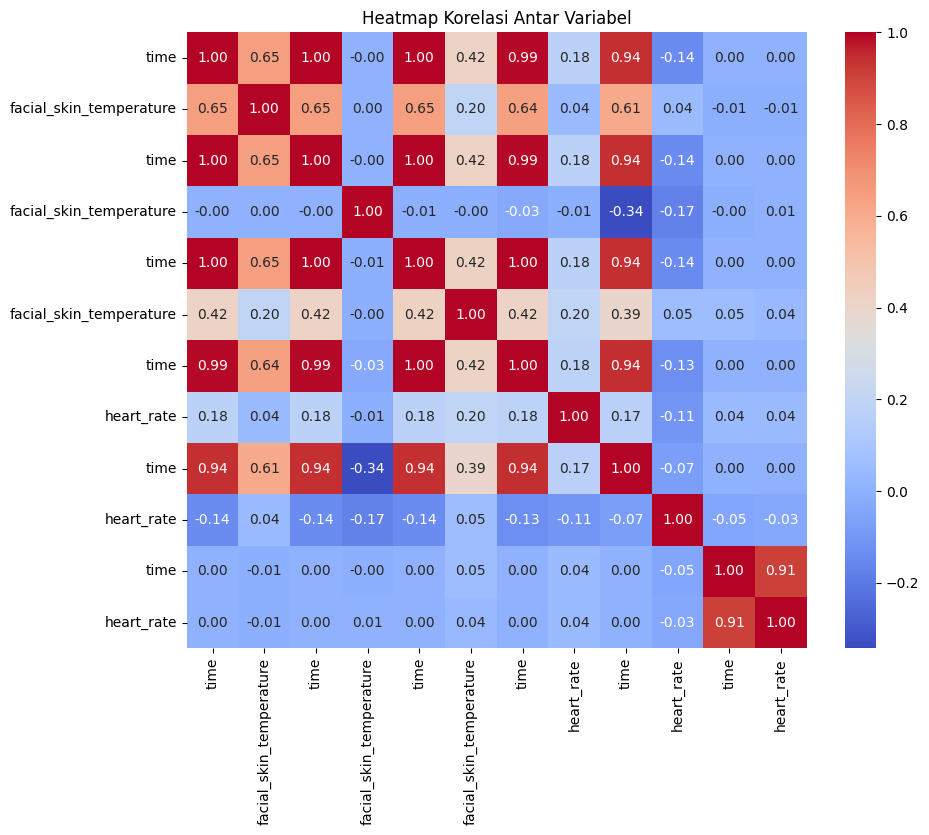

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(mn_mean.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

In [ ]:
mn.isnull().sum()

time                         66
facial_skin_temperature      66
time                         66
facial_skin_temperature      66
time                         64
facial_skin_temperature      64
time                         60
heart_rate                   60
time                          0
heart_rate                    0
time                       1569
heart_rate                 1569
dtype: int64

In [ ]:
mn.dtypes

time                       float64
facial_skin_temperature    float64
time                       float64
facial_skin_temperature    float64
time                       float64
facial_skin_temperature    float64
time                       float64
heart_rate                 float64
time                       float64
heart_rate                 float64
time                       float64
heart_rate                 float64
dtype: object

In [ ]:
target_column = "time"  # nama kolom
if target_column in mn_mean.columns:
    X = mn_mean.drop(target_column, axis=1)  # Memisahkan fitur
    y = mn_mean[target_column]  # Target
else:
    raise ValueError(f"Kolom '{target_column}' tidak ditemukan dalam data.")

In [ ]:
# melihat outlier
def count_outliers_iqr(db):
    Q1 = mn.quantile(0.25)
    Q3 = mn.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((mn < lower_bound) | (mn > upper_bound)).sum()

In [ ]:
outliers = {}
for col in mn.select_dtypes(include=["float64"]).columns:
    outliers[col] = count_outliers_iqr(mn[col])

#convert the result into a datafream for easier viewing
outliers_counts_mn = pd.DataFrame(list(outliers.items()), columns =['Column', 'Outlier Count'])

#display the outlier counts DataFrame

outliers_counts_mn

,Column,Outlier Count
0,time,time 0 facial_skin_temp...
1,facial_skin_temperature,time 0 facial_skin_temp...
2,heart_rate,time 0 facial_skin_temp...


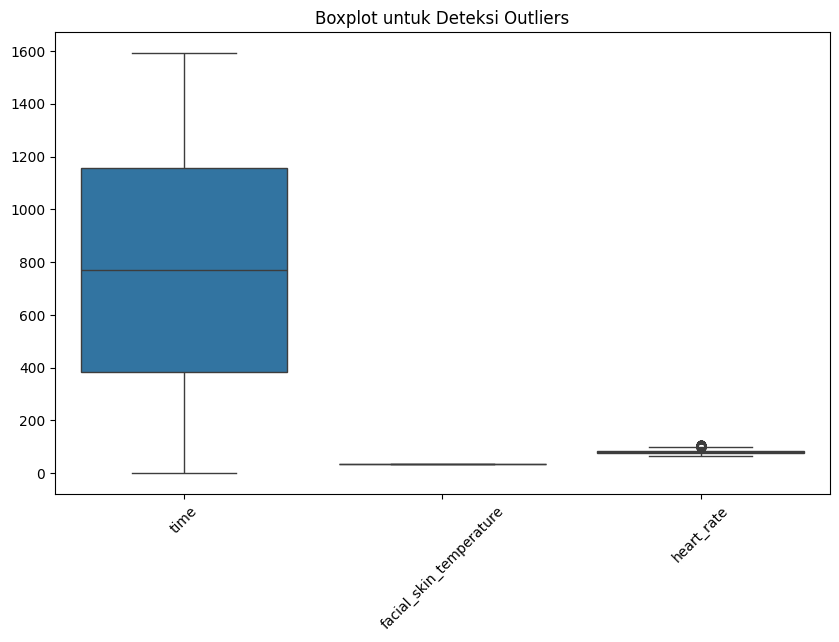

In [ ]:
# Analisis Outliers menggunakan boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=mn)
plt.title('Boxplot untuk Deteksi Outliers')
plt.xticks(rotation=45)
plt.show()


In [ ]:
user_0 = pd.read_csv ("facial_skin_temperature.csv")
user_1 = pd.read_csv ("facial_skin_temperature (1).csv")
user_2 = pd.read_csv ("facial_skin_temperature (2).csv")

user_0["kelas"] = "amateurs"
user_1["kelas"] = "pros"
user_2["kelas"] = "pros"

data = pd.concat([user_0, user_1, user_2], axis=1)

In [ ]:
data

,time,facial_skin_temperature,kelas,time,facial_skin_temperature,kelas,time,facial_skin_temperature,kelas
0,3.0,33.680000,amateurs,4.0,34.13,pros,1.0,34.104500,pros
1,4.0,33.675267,amateurs,5.0,34.13,pros,2.0,34.102889,pros
2,5.0,33.669857,amateurs,6.0,34.13,pros,3.0,34.101048,pros
3,6.0,33.663907,amateurs,7.0,34.13,pros,4.0,34.099022,pros
4,7.0,33.657555,amateurs,8.0,34.13,pros,5.0,34.096860,pros
...,...,...,...,...,...,...,...,...,...
1524,1527.0,35.323935,amateurs,1528.0,34.13,pros,1525.0,34.303326,pros
1525,1528.0,35.360129,amateurs,1529.0,34.13,pros,1526.0,34.278823,pros
1526,1529.0,35.398129,amateurs,1530.0,34.13,pros,1527.0,34.255235,pros
1527,NaN,NaN,NaN,NaN,NaN,NaN,1528.0,34.232106,pros


In [ ]:
data.isnull().sum()

time                       2
facial_skin_temperature    2
kelas                      2
time                       2
facial_skin_temperature    2
kelas                      2
time                       0
facial_skin_temperature    0
kelas                      0
dtype: int64

In [ ]:
# melihat outlier
def count_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((data < lower_bound) | (data > upper_bound)).sum()

In [ ]:
outliers = {}
for col in data.select_dtypes(include=['float64']).columns:
    outliers[col] = count_outliers_iqr(data[col])

#convert the result into a datafream for easier viewing
outliers_counts_data = pd.DataFrame(list(outliers.items()), columns =['Column', 'Outlier Count'])

#display the outlier counts DataFrame

outliers_counts_data

,Column,Outlier Count
0,time,time 0 time 0 time 0 dtype: int64
1,facial_skin_temperature,facial_skin_temperature 59 facial_skin_temp...


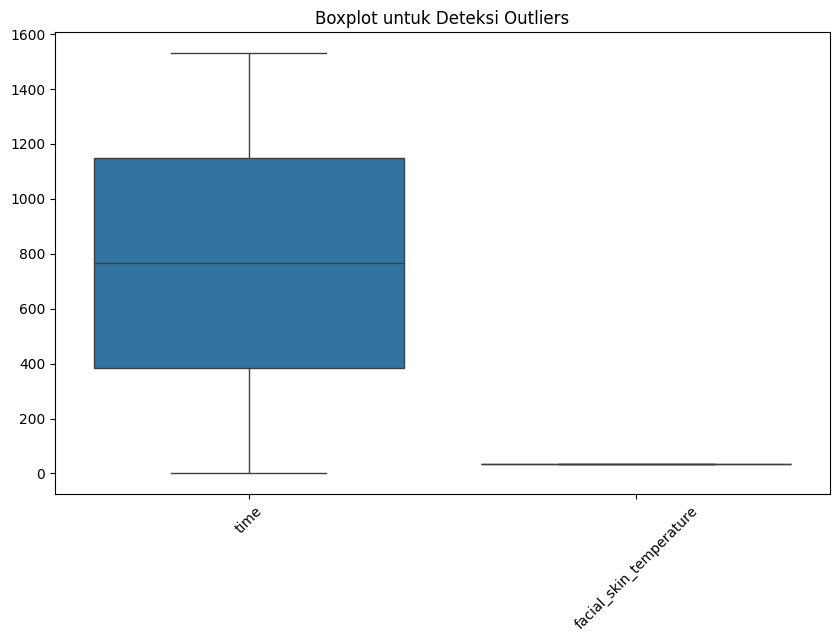

In [ ]:
# Analisis Outliers menggunakan boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.title('Boxplot untuk Deteksi Outliers')
plt.xticks(rotation=45)
plt.show()

interpretasi:
berdasarkan data facial yang saya analisis ada beberapa informasi yang dapat diambil
1. rata rata setiap waktu yang dibutuhkan adalah 1527.0
2. dan waktu facial_skin_temperature setiap user adalah 34.13000